In [118]:
# import the packages
import pandas as pd
import numpy as np
from pydbgen import pydbgen

In [12]:
# instanciate the faker
faker = pydbgen.pydb()

## Create the functions

In [192]:
def genCreditScore(size = 1, m = 690, std = 40):
    arr = np.random.normal(m, std, size).astype(int)                   # generate random integers
    arr = np.clip(arr, 300, 850)                                       # clip respecting boundaries
    return (arr)

def genBalance(size = 1, l = 2, factor = 1000):
    arr = np.random.poisson(l, size)                                   # generate numbers from a poisson distribution
    arr = arr * np.random.uniform(low = 0.0, high = 1.0, size = size)  # add some noise
    arr = arr * factor                                                 # increase the scale by a factor
    arr = np.around(arr, 2)                                            # round it to 2 decimal places
    return (arr)

def genEducation(size = 1, levels = ['High school', 'Bachelors', 'Masters', 'PhD'], prob = [0.45, 0.35, 0.18, 0.02]):
    arr = np.random.choice(levels, size = size, p = prob)              # decide levels based on input probabilities
    return (arr)

def genDateofBirth(size = 1, m = 50, std = 20):
    arr = np.random.normal(m, std, size).astype(int)                   # generate random integers of mean m and std spec
    arr = np.clip(arr, 20, 90)                                         # clip respecting boundaries
    arr = np.datetime64('today') - arr * 365                           # generate the arrays of past dates
    return (arr)

def genName(size = 1):
    return (np.array([faker.fake.name() for i in range(size)]))        # return an array of the specified size of names

def genEmail(size = 1):
    return (np.array([faker.fake.email() for i in range(size)]))       # return an array of the specified size of emails

def genAddress(size = 1):
    return (np.array([faker.fake.address() for i in range(size)]))     # return an array of the specified size of addresses

def genCompany(size = 1):
    return (np.array([faker.fake.company() for i in range(size)]))     # return an array of the specified size of companies

def genPhone(size = 1):
    return (np.array([faker.simple_ph_num() for i in range(size)]))    # return an array of the specified size of phones

In [193]:
def genDataset(size = 10000):
    data = {'Name': genName(size),
            'DateofBirth': genDateofBirth(size),
            'Email': genEmail(size),
            'Phone': genPhone(size),
            'Address': genAddress(size),
            'Company': genCompany(size),
            'Education': genEducation(size),
            'Balance': genBalance(size),
            'CreditScore': genCreditScore(size)}
    return (pd.DataFrame(data))

## Call the functions

In [194]:
# generate the fake data and save the csv and excel files
df = genDataset()
df.to_csv('dataset.csv', index = False)
df.to_excel('dataset.xlsx', index = False)

## Check the distributions

In [180]:
import matplotlib.pyplot as plt

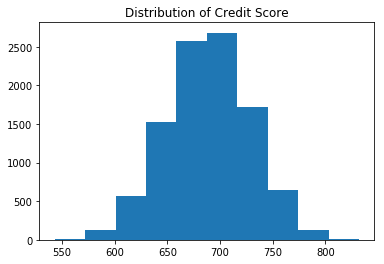

In [195]:
# plt the distribution of Credit Score
plt.hist(df.CreditScore)
plt.title('Distribution of Credit Score')
plt.show()

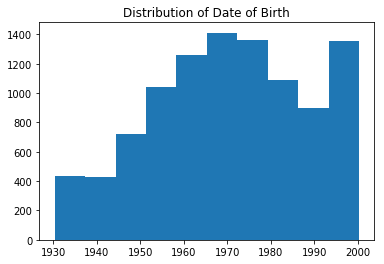

In [199]:
# plt the distribution of Date of Birth
plt.hist(df.DateofBirth)
plt.title('Distribution of Date of Birth')
plt.show()

In [206]:
df.Education.value_counts().values

array([4445, 3559, 1791,  205], dtype=int64)

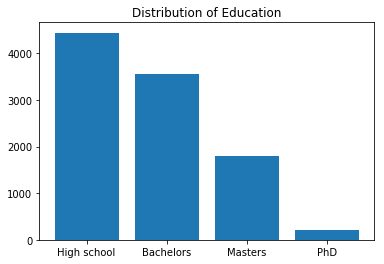

In [209]:
# plt the distribution of Education
plt.bar(df.Education.value_counts().index, df.Education.value_counts().values)
plt.xticks([0,1,2,3], df.Education.value_counts().index)
plt.title('Distribution of Education')
plt.show()

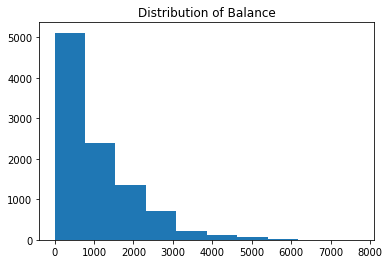

In [198]:
# plt the distribution of Balance
plt.hist(df.Balance)
plt.title('Distribution of Balance')
plt.show()

In [211]:
df.head(10)

,Name,DateofBirth,Email,Phone,Address,Company,Education,Balance,CreditScore
0,Alicia Romero,1969-05-02,brandon96@vargas.com,455-902-5397,"99437 Nathan Streets\nMichaelview, MO 69640",Mendoza Inc,Bachelors,2686.27,676
1,Erik Lopez,1964-05-03,fitzpatrickphillip@weber.net,865-474-4229,"94428 Daniel Keys\nEast Anthony, SC 88308",Butler Inc,High school,512.10,722
2,Katherine Powell,1988-04-27,irwinlauren@young-young.com,592-740-6717,"53315 Leon Landing\nKaufmanland, MD 50636","Thomas, Horne and Rodriguez",Bachelors,1063.04,732
3,Kristina Perry,1993-04-26,pattondaniel@gmail.com,132-598-6520,"21069 William Fort\nSarahville, MD 73910",Riley-Dawson,High school,675.90,724
4,Danielle Lee,1972-05-01,hillstacey@sanchez.com,820-517-1780,"300 Kimberly Forge\nLake Barbaraside, OR 81246",Smith Inc,Masters,0.00,698
5,Mrs. Holly Salazar MD,1956-05-05,sbaker@hotmail.com,494-212-2176,Unit 8414 Box 6849\nDPO AE 18301,"Mason, Barber and Martin",High school,2411.27,679
6,Benjamin Patel,1950-05-07,blackjames@hernandez.info,338-485-1765,"299 Andrew Turnpike Suite 798\nRothmouth, WI 3...",Spencer-Barber,Masters,208.08,662
7,Kathy Sweeney,1980-04-29,pamelaluna@yahoo.com,225-585-1660,USCGC Patterson\nFPO AE 04661,Ball Inc,Bachelors,0.00,716
8,Robin White,1987-04-28,qharvey@yahoo.com,188-014-2283,"61620 Nelson Lake Suite 925\nNorth William, MO...",Hill Ltd,Masters,735.61,655
9,Peter Cooper MD,1949-05-07,christopher71@wilson.com,780-802-8317,"28371 Kyle Lock Apt. 609\nNicoleland, SD 93746",Cooper-Garcia,Masters,0.00,769
